In [62]:
import pydataset

In [63]:
df= pydataset.data("iris")

In [64]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [65]:
# ! pip install -U scikit-learn scipy matplotlib

In [66]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense

In [67]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df['Species'])

In [68]:
df['Species'] = labels


In [69]:
X = df[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
y = df[['Species']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

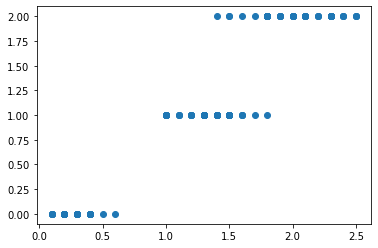

In [70]:
plt.scatter(df['Petal.Width'], df['Species'])

plt.show()

In [71]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
knnModel.score(x_test, y_test)

1.0

## 1.RELU

In [73]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.utils import get_custom_objects
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid

In [74]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = Sequential()

#ADD FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYERS WILL BE ADDED AUTOAMTICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))


#ADDING OUTPUT LAYER WITH 1 NEURON, AS THIS IS BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [75]:
#now testing for test data

y_pred = ann.predict(x_test)

#converting values
y_pred = (y_pred>0.5)

1/1 [==============================] - 0s 129ms/step


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)
score1 = accuracy_score(y_test,y_pred)
print(cm)
print("score is",score1)

[[ 0  8  0]
 [ 0 11  0]
 [ 0 11  0]]
score is 0.36666666666666664


In [42]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.23      1.00      0.38         7
           2       0.00      0.00      0.00        15

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30



<AxesSubplot:>

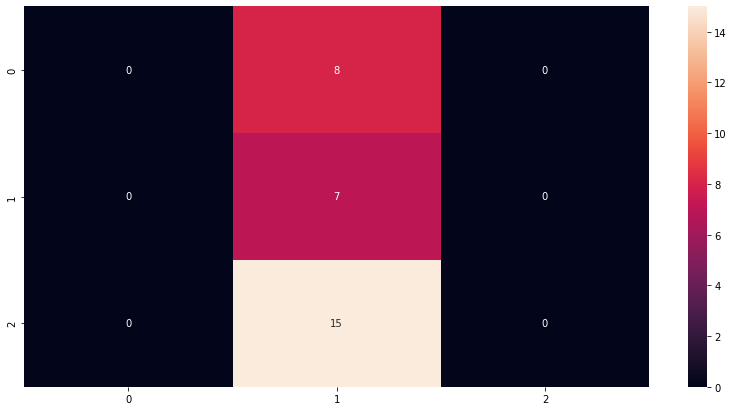

In [43]:
# creating heatmap of confusion matrix 
import seaborn as sns
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot = True)

In [44]:
from tensorflow.keras.layers import BatchNormalization

# creating the ann as sequence of layers

ann = Sequential()

#adding first hidden layer with 30 neurons,the input layer will be added automatically

ann.add(Dense(units=30,activation='softmax'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

# adding output layer with 1 neuron, as this a binary classification

ann.add(Dense(units=1,activation='sigmoid'))

In [45]:
#compiling the ann using stochastic gradient descent (optimizer - adam)

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#setting callback for monitoring maximum accuracy

from tabnanny import verbose
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=25)

#traiining the ann with batch size of 32 (this is a batch learning)

model = ann.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=500,callbacks=[early_stop])

Epoch 1/500
4/4 [==============================] - 1s 57ms/step - loss: 0.6589 - accuracy: 0.4750 - val_loss: 0.6053 - val_accuracy: 0.2333
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6319 - accuracy: 0.4667 - val_loss: 0.5837 - val_accuracy: 0.2333
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6015 - accuracy: 0.4583 - val_loss: 0.5619 - val_accuracy: 0.2333
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5260 - accuracy: 0.5167 - val_loss: 0.5405 - val_accuracy: 0.2333
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4223 - accuracy: 0.5083 - val_loss: 0.5191 - val_accuracy: 0.2333
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4649 - accuracy: 0.5750 - val_loss: 0.4976 - val_accuracy: 0.2333
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3661 - accuracy: 0.5667 - val_loss: 0.4760 - val_accuracy: 0.2333
Epoch 8/500
4/4 [===

Epoch 59/500
4/4 [==============================] - 0s 14ms/step - loss: -2.7722 - accuracy: 0.7083 - val_loss: -1.5116 - val_accuracy: 0.2333
Epoch 60/500
4/4 [==============================] - 0s 12ms/step - loss: -3.1085 - accuracy: 0.7083 - val_loss: -1.5762 - val_accuracy: 0.2333
Epoch 61/500
4/4 [==============================] - 0s 14ms/step - loss: -2.9920 - accuracy: 0.7000 - val_loss: -1.6409 - val_accuracy: 0.2333
Epoch 62/500
4/4 [==============================] - 0s 13ms/step - loss: -2.9815 - accuracy: 0.7000 - val_loss: -1.7069 - val_accuracy: 0.2333
Epoch 63/500
4/4 [==============================] - 0s 12ms/step - loss: -3.2301 - accuracy: 0.7083 - val_loss: -1.7770 - val_accuracy: 0.2333
Epoch 64/500
4/4 [==============================] - 0s 15ms/step - loss: -3.1171 - accuracy: 0.7000 - val_loss: -1.8496 - val_accuracy: 0.2333
Epoch 65/500
4/4 [==============================] - 0s 15ms/step - loss: -3.4494 - accuracy: 0.7083 - val_loss: -1.9220 - val_accuracy: 0.2333

4/4 [==============================] - 0s 10ms/step - loss: -9.1986 - accuracy: 0.7083 - val_loss: -9.5318 - val_accuracy: 0.2333
Epoch 117/500
4/4 [==============================] - 0s 10ms/step - loss: -9.8768 - accuracy: 0.7000 - val_loss: -9.7778 - val_accuracy: 0.2667
Epoch 118/500
4/4 [==============================] - 0s 10ms/step - loss: -9.6327 - accuracy: 0.7083 - val_loss: -10.0125 - val_accuracy: 0.2667
Epoch 119/500
4/4 [==============================] - 0s 10ms/step - loss: -9.3350 - accuracy: 0.7000 - val_loss: -10.2577 - val_accuracy: 0.2667
Epoch 120/500
4/4 [==============================] - 0s 11ms/step - loss: -8.9944 - accuracy: 0.7083 - val_loss: -10.5084 - val_accuracy: 0.2667
Epoch 121/500
4/4 [==============================] - 0s 7ms/step - loss: -9.6525 - accuracy: 0.7000 - val_loss: -10.7507 - val_accuracy: 0.2667
Epoch 122/500
4/4 [==============================] - 0s 11ms/step - loss: -9.6655 - accuracy: 0.7000 - val_loss: -10.9767 - val_accuracy: 0.3333
Ep

4/4 [==============================] - 0s 15ms/step - loss: -17.9097 - accuracy: 0.6583 - val_loss: -28.2837 - val_accuracy: 0.5000
Epoch 173/500
4/4 [==============================] - 0s 10ms/step - loss: -17.8143 - accuracy: 0.6667 - val_loss: -28.7805 - val_accuracy: 0.5000
Epoch 174/500
4/4 [==============================] - 0s 10ms/step - loss: -17.6855 - accuracy: 0.7000 - val_loss: -29.1615 - val_accuracy: 0.5000
Epoch 175/500
4/4 [==============================] - 0s 11ms/step - loss: -17.3965 - accuracy: 0.6750 - val_loss: -29.4383 - val_accuracy: 0.5000
Epoch 176/500
4/4 [==============================] - 0s 11ms/step - loss: -19.9416 - accuracy: 0.6833 - val_loss: -29.7244 - val_accuracy: 0.5000
Epoch 177/500
4/4 [==============================] - 0s 11ms/step - loss: -18.7430 - accuracy: 0.6667 - val_loss: -30.0338 - val_accuracy: 0.5000
Epoch 178/500
4/4 [==============================] - 0s 7ms/step - loss: -18.3557 - accuracy: 0.6667 - val_loss: -30.3849 - val_accuracy: 

4/4 [==============================] - 0s 11ms/step - loss: -27.1532 - accuracy: 0.6083 - val_loss: -49.6334 - val_accuracy: 0.5000
Epoch 229/500
4/4 [==============================] - 0s 11ms/step - loss: -27.6727 - accuracy: 0.6833 - val_loss: -50.1699 - val_accuracy: 0.5000
Epoch 230/500
4/4 [==============================] - 0s 17ms/step - loss: -27.7441 - accuracy: 0.5833 - val_loss: -50.6395 - val_accuracy: 0.5000
Epoch 231/500
4/4 [==============================] - 0s 7ms/step - loss: -30.2517 - accuracy: 0.6083 - val_loss: -51.1326 - val_accuracy: 0.5000
Epoch 232/500
4/4 [==============================] - 0s 7ms/step - loss: -28.6855 - accuracy: 0.5917 - val_loss: -51.6397 - val_accuracy: 0.5000
Epoch 233/500
4/4 [==============================] - 0s 10ms/step - loss: -29.0454 - accuracy: 0.6417 - val_loss: -51.7992 - val_accuracy: 0.5000
Epoch 234/500
4/4 [==============================] - 0s 11ms/step - loss: -27.7008 - accuracy: 0.5583 - val_loss: -52.1877 - val_accuracy: 0

4/4 [==============================] - 0s 10ms/step - loss: -43.3707 - accuracy: 0.6250 - val_loss: -71.3388 - val_accuracy: 0.5000
Epoch 285/500
4/4 [==============================] - 0s 10ms/step - loss: -38.1498 - accuracy: 0.5750 - val_loss: -71.4592 - val_accuracy: 0.5000
Epoch 286/500
4/4 [==============================] - 0s 10ms/step - loss: -40.1801 - accuracy: 0.5417 - val_loss: -71.9813 - val_accuracy: 0.5000
Epoch 287/500
4/4 [==============================] - 0s 10ms/step - loss: -39.2697 - accuracy: 0.6000 - val_loss: -72.3736 - val_accuracy: 0.5000
Epoch 288/500
4/4 [==============================] - 0s 11ms/step - loss: -42.9204 - accuracy: 0.5333 - val_loss: -73.0386 - val_accuracy: 0.5000
Epoch 289/500
4/4 [==============================] - 0s 11ms/step - loss: -39.8809 - accuracy: 0.6083 - val_loss: -73.7723 - val_accuracy: 0.5000
Epoch 290/500
4/4 [==============================] - 0s 8ms/step - loss: -40.0644 - accuracy: 0.6083 - val_loss: -74.2221 - val_accuracy: 

4/4 [==============================] - 0s 13ms/step - loss: -52.8494 - accuracy: 0.5917 - val_loss: -95.3623 - val_accuracy: 0.5000
Epoch 341/500
4/4 [==============================] - 0s 13ms/step - loss: -53.4306 - accuracy: 0.6000 - val_loss: -95.3012 - val_accuracy: 0.5000
Epoch 342/500
4/4 [==============================] - 0s 10ms/step - loss: -54.4784 - accuracy: 0.6083 - val_loss: -95.4534 - val_accuracy: 0.5000
Epoch 343/500
4/4 [==============================] - 0s 9ms/step - loss: -52.1251 - accuracy: 0.5750 - val_loss: -95.5885 - val_accuracy: 0.5000
Epoch 344/500
4/4 [==============================] - 0s 13ms/step - loss: -53.3123 - accuracy: 0.6250 - val_loss: -95.9836 - val_accuracy: 0.5000
Epoch 345/500
4/4 [==============================] - 0s 8ms/step - loss: -55.8793 - accuracy: 0.6083 - val_loss: -96.1278 - val_accuracy: 0.5000
Epoch 346/500
4/4 [==============================] - 0s 6ms/step - loss: -54.4820 - accuracy: 0.5583 - val_loss: -96.6079 - val_accuracy: 0.

4/4 [==============================] - 0s 9ms/step - loss: -68.5151 - accuracy: 0.5500 - val_loss: -120.0643 - val_accuracy: 0.5000
Epoch 397/500
4/4 [==============================] - 0s 12ms/step - loss: -66.4018 - accuracy: 0.5250 - val_loss: -120.8902 - val_accuracy: 0.5000
Epoch 398/500
4/4 [==============================] - 0s 12ms/step - loss: -64.4186 - accuracy: 0.5750 - val_loss: -121.4194 - val_accuracy: 0.5000
Epoch 399/500
4/4 [==============================] - 0s 10ms/step - loss: -68.6565 - accuracy: 0.5833 - val_loss: -121.6535 - val_accuracy: 0.5000
Epoch 400/500
4/4 [==============================] - 0s 11ms/step - loss: -69.1633 - accuracy: 0.6417 - val_loss: -121.7859 - val_accuracy: 0.5000
Epoch 401/500
4/4 [==============================] - 0s 11ms/step - loss: -68.5216 - accuracy: 0.5667 - val_loss: -121.9504 - val_accuracy: 0.5000
Epoch 402/500
4/4 [==============================] - 0s 11ms/step - loss: -69.0216 - accuracy: 0.5500 - val_loss: -122.3851 - val_acc

Epoch 452/500
4/4 [==============================] - 0s 11ms/step - loss: -87.9489 - accuracy: 0.5833 - val_loss: -148.8670 - val_accuracy: 0.5000
Epoch 453/500
4/4 [==============================] - 0s 11ms/step - loss: -81.7756 - accuracy: 0.5833 - val_loss: -149.2318 - val_accuracy: 0.5000
Epoch 454/500
4/4 [==============================] - 0s 8ms/step - loss: -77.2553 - accuracy: 0.5583 - val_loss: -149.5487 - val_accuracy: 0.5000
Epoch 455/500
4/4 [==============================] - 0s 6ms/step - loss: -82.2359 - accuracy: 0.5333 - val_loss: -150.4706 - val_accuracy: 0.5000
Epoch 456/500
4/4 [==============================] - 0s 10ms/step - loss: -86.2283 - accuracy: 0.5750 - val_loss: -150.8741 - val_accuracy: 0.5000
Epoch 457/500
4/4 [==============================] - 0s 10ms/step - loss: -78.8848 - accuracy: 0.5167 - val_loss: -151.4383 - val_accuracy: 0.5000
Epoch 458/500
4/4 [==============================] - 0s 11ms/step - loss: -79.9123 - accuracy: 0.5500 - val_loss: -152.5